<a href="https://colab.research.google.com/github/Je-97/stc-TV-viewership-analysis/blob/main/stctvviewing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxlsb
!pip install pandas
!pip install matplotlib
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import pyxlsb
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_excel('stc TV Data Set_T1.xlsb', engine='pyxlsb', sheet_name="Final_Dataset")

In [ ]:
df.shape

(1048575, 13)

In [ ]:
df = df.drop(columns=['Column1'])
df['program_name'] = df['program_name'].str.strip()
df['date_'] = pd.to_datetime(df['date_'], unit='D', origin='30/12/1899')
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str)

In [ ]:
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [ ]:
df.describe()

,date_,duration_seconds,season,episode,series_title,hd
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2017-10-04 00:23:20.346183936,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
min,2017-03-14 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-06-10 00:00:00,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017-10-14 00:00:00,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2018-01-21 00:00:00,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,2018-04-30 00:00:00,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00
std,NaN,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01


In [ ]:
max_value = df.max()
min_value = df.min()
print("Maximum Values:\n", max_value)
print("Minimum Values:\n", min_value)

Maximum Values:
 date_                      2018-04-30 00:00:00
user_id_maped                             9999
program_name        xXx: Return of Xander Cage
duration_seconds                       1461329
program_class                  SERIES/EPISODES
season                                      23
episode                                    282
program_desc                               nan
program_genre                        Wrestling
series_title                                 1
hd                                           1
original_name       xXx: Return of Xander Cage
dtype: object
Minimum Values:
 date_                  2017-03-14 00:00:00
user_id_maped                            1
program_name                 #FollowFriday
duration_seconds                         2
program_class                        MOVIE
season                                   0
episode                                  0
program_desc        Action Movie0-8-4 (HD)
program_genre                       Action
s

In [ ]:
df.isnull().any()

date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

In [ ]:
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [ ]:
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [ ]:
top_programs = df.nlargest(10, 'duration_seconds')

fig = px.pie(top_programs, values='duration_seconds', names='program_name', title='Viewership rate for the top 10 programs',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


In [ ]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [ ]:
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


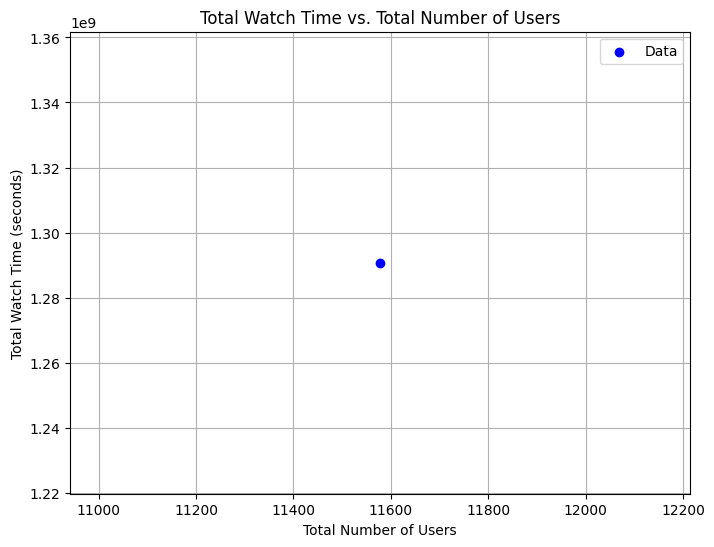

Total number of users: 11578
Total watch time: 1290750959 seconds


In [ ]:
total_watch_time = df['duration_seconds'].sum()
total_users = len(df['user_id_maped'].unique())

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(total_users, total_watch_time, color='b', label='Data')
plt.xlabel('Total Number of Users')
plt.ylabel('Total Watch Time (seconds)')
plt.title('Total Watch Time vs. Total Number of Users')
plt.grid(True)
plt.legend()
plt.show()

# Report the findings
print(f"Total number of users: {total_users}")
print(f"Total watch time: {total_watch_time} seconds")


In [ ]:
# Choose the column containing program descriptions and quality (HD)
desc_column = 'program_desc'

# Calculate the count of HD programs
hd_programs_count = df[desc_column].str.contains('HD').sum()

# Calculate the total number of programs
total_programs = len(df)

# Calculate the percentage of HD programs
hd_percentage = (hd_programs_count / total_programs) * 100

print(f"The percentage of HD programs in the '{desc_column}' column is: {hd_percentage:.2f}%")


The percentage of HD programs in the 'program_desc' column is: 64.50%


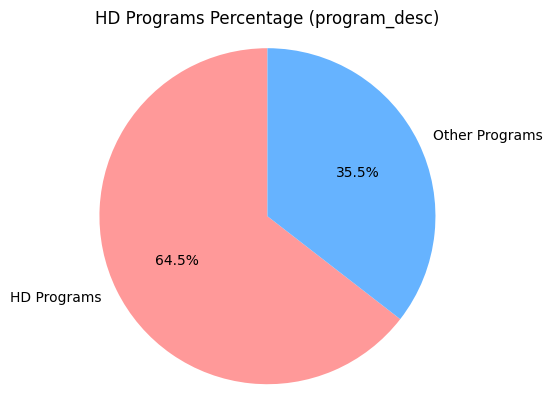

In [ ]:
labels = ['HD Programs', 'Other Programs']
sizes = [hd_programs_count, total_programs - hd_programs_count]
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f"HD Programs Percentage ({desc_column})")

# Show the plot
plt.axis('equal')
plt.show()
